In [ ]:
import numpy as np
import string
import random
import time
import matplotlib.pyplot as plt

In [ ]:
def generate_random_tree(num_nodes):
    tree = {0: []}  # root node

    nodes_queue = [0]  # Queue to keep track of nodes to explore
    available_nodes = set(range(1, num_nodes))  # Nodes from 1 to num_nodes
    while nodes_queue and available_nodes:
        parent = nodes_queue.pop(0)

        num_children = random.randint(1, 2)  # Generate a random number of children (0 or 1 or 2)
        children = []

        for _ in range(num_children):
            if available_nodes:
                child = available_nodes.pop()
                children.append(child)
                tree[child] = []
                nodes_queue.append(child)

        tree[parent] = children

    return tree

# Example usage:
num_nodes = 100  # Change the number of nodes as per requirement
tree = generate_random_tree(num_nodes)
variances = {}
for i in range(num_nodes):
    variances[i] = 1
print("Random Tree:")
print(tree)
print("Variances:")
print(variances)

Random Tree:
{0: [1, 2], 1: [3], 2: [4], 3: [5, 6], 4: [7], 5: [8], 6: [9], 7: [10, 11], 8: [12, 13], 9: [14, 15], 10: [16, 17], 11: [18], 12: [19], 13: [20, 21], 14: [22, 23], 15: [24, 25], 16: [26], 17: [27, 28], 18: [29, 30], 19: [31, 32], 20: [33], 21: [34, 35], 22: [36, 37], 23: [38, 39], 24: [40], 25: [41, 42], 26: [43], 27: [44], 28: [45, 46], 29: [47, 48], 30: [49], 31: [50, 51], 32: [52, 53], 33: [54, 55], 34: [56], 35: [57, 58], 36: [59, 60], 37: [61, 62], 38: [63], 39: [64, 65], 40: [66], 41: [67, 68], 42: [69], 43: [70], 44: [71, 72], 45: [73], 46: [74], 47: [75, 76], 48: [77, 78], 49: [79, 80], 50: [81, 82], 51: [83, 84], 52: [85], 53: [86], 54: [87], 55: [88], 56: [89], 57: [90], 58: [91], 59: [92, 93], 60: [94, 95], 61: [96], 62: [97, 98], 63: [99], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 9

In [ ]:
true_tree = []
for key in tree:
    for item in tree[key]:
        true_tree.append((key,item))
true_tree

[(0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (3, 6),
 (4, 7),
 (5, 8),
 (6, 9),
 (7, 10),
 (7, 11),
 (8, 12),
 (8, 13),
 (9, 14),
 (9, 15),
 (10, 16),
 (10, 17),
 (11, 18),
 (12, 19),
 (13, 20),
 (13, 21),
 (14, 22),
 (14, 23),
 (15, 24),
 (15, 25),
 (16, 26),
 (17, 27),
 (17, 28),
 (18, 29),
 (18, 30),
 (19, 31),
 (19, 32),
 (20, 33),
 (21, 34),
 (21, 35),
 (22, 36),
 (22, 37),
 (23, 38),
 (23, 39),
 (24, 40),
 (25, 41),
 (25, 42),
 (26, 43),
 (27, 44),
 (28, 45),
 (28, 46),
 (29, 47),
 (29, 48),
 (30, 49),
 (31, 50),
 (31, 51),
 (32, 52),
 (32, 53),
 (33, 54),
 (33, 55),
 (34, 56),
 (35, 57),
 (35, 58),
 (36, 59),
 (36, 60),
 (37, 61),
 (37, 62),
 (38, 63),
 (39, 64),
 (39, 65),
 (40, 66),
 (41, 67),
 (41, 68),
 (42, 69),
 (43, 70),
 (44, 71),
 (44, 72),
 (45, 73),
 (46, 74),
 (47, 75),
 (47, 76),
 (48, 77),
 (48, 78),
 (49, 79),
 (49, 80),
 (50, 81),
 (50, 82),
 (51, 83),
 (51, 84),
 (52, 85),
 (53, 86),
 (54, 87),
 (55, 88),
 (56, 89),
 (57, 90),
 (58, 91),
 (59, 92),
 (59, 93),
 

In [ ]:
true_tree_set = set(true_tree)
print(true_tree_set)

{(25, 41), (33, 54), (14, 22), (7, 10), (49, 80), (3, 6), (2, 4), (22, 37), (60, 94), (19, 32), (15, 25), (18, 30), (47, 75), (32, 53), (20, 33), (23, 38), (31, 51), (51, 84), (13, 21), (28, 46), (16, 26), (36, 59), (0, 2), (56, 89), (21, 34), (9, 14), (29, 47), (41, 67), (1, 3), (44, 72), (52, 85), (45, 73), (50, 81), (59, 93), (10, 17), (37, 62), (25, 42), (3, 5), (54, 87), (63, 99), (26, 43), (14, 23), (55, 88), (8, 13), (38, 63), (11, 18), (19, 31), (39, 64), (27, 44), (7, 11), (30, 49), (12, 19), (32, 52), (35, 57), (43, 70), (17, 27), (28, 45), (48, 78), (57, 90), (53, 86), (62, 98), (58, 91), (44, 71), (61, 96), (46, 74), (49, 79), (33, 55), (21, 35), (41, 68), (59, 92), (22, 36), (10, 16), (34, 56), (37, 61), (15, 24), (18, 29), (42, 69), (8, 12), (50, 82), (31, 50), (51, 83), (60, 95), (13, 20), (47, 76), (0, 1), (23, 39), (39, 65), (48, 77), (4, 7), (24, 40), (36, 60), (5, 8), (35, 58), (62, 97), (9, 15), (29, 48), (17, 28), (40, 66), (6, 9)}


In [ ]:
# Generate i.i.d. samples
def generate_samples(node, parent_sample=None, samples={}):
    if parent_sample is not None:
        sample = np.random.normal(0, variances[node]) + parent_sample
    else:
        sample = np.random.normal(0, variances[node])

    samples[node] = sample

    for child_node in tree[node]:
        generate_samples(child_node, sample)
    return samples

In [ ]:
# Generate samples starting from the root node
samples = generate_samples(0)
Nodes = []
for node, sample in samples.items():
    Nodes.append(node)
Nodes

[0,
 1,
 3,
 5,
 8,
 12,
 19,
 31,
 50,
 81,
 82,
 51,
 83,
 84,
 32,
 52,
 85,
 53,
 86,
 13,
 20,
 33,
 54,
 87,
 55,
 88,
 21,
 34,
 56,
 89,
 35,
 57,
 90,
 58,
 91,
 6,
 9,
 14,
 22,
 36,
 59,
 92,
 93,
 60,
 94,
 95,
 37,
 61,
 96,
 62,
 97,
 98,
 23,
 38,
 63,
 99,
 39,
 64,
 65,
 15,
 24,
 40,
 66,
 25,
 41,
 67,
 68,
 42,
 69,
 2,
 4,
 7,
 10,
 16,
 26,
 43,
 70,
 17,
 27,
 44,
 71,
 72,
 28,
 45,
 73,
 46,
 74,
 11,
 18,
 29,
 47,
 75,
 76,
 48,
 77,
 78,
 30,
 49,
 79,
 80]

In [ ]:
total_samples = []
for _ in range(50):
    samples = generate_samples(0)
    X = []
    for key,value in samples.items():
        X.append(value)
    total_samples.append(X)
X = np.array(total_samples)
X

array([[ 1.92767250e+00,  3.31401627e+00,  8.08075513e-01, ...,
         6.93693470e+00,  7.36813147e+00,  7.47812287e+00],
       [-3.09848461e-02,  1.28766519e+00, -3.39936169e-01, ...,
        -2.15445033e+00, -3.67078627e-01, -1.25257745e+00],
       [-1.85727454e+00, -2.67777804e-01,  2.84863747e-01, ...,
         5.06810085e-03, -1.20699177e+00, -1.32266680e+00],
       ...,
       [-7.64611790e-01,  1.75101773e-01,  6.90699365e-01, ...,
         9.50727723e-01,  4.41951776e-01,  8.78673978e-01],
       [-1.85788050e+00, -3.50573492e+00, -3.10579966e+00, ...,
        -2.21991403e+00, -7.80316644e-01, -2.74059242e+00],
       [-9.16547895e-01, -3.21559129e+00, -3.44069753e+00, ...,
        -3.27955103e+00, -3.22140513e+00, -1.91263124e+00]])

In [ ]:
X.shape

(50, 100)

In [ ]:
emp_cov = np.dot(X.T, X) / (len(X)-1)   # emp_cov = np.cov(X,rowvar=False)
#emp_cov

In [ ]:
rho_matrix = []
for i in range(len(emp_cov)):
    tmp = []
    for j in range(len(emp_cov)):
        tmp.append(emp_cov[i][j]/(((emp_cov[i][i])*(emp_cov[j][j]))**(0.5)))
    rho_matrix.append(tmp)
#rho_matrix

In [ ]:
rho_matrix = np.array(rho_matrix)
rho_matrix.shape

(100, 100)

In [ ]:
mut_inf = []
for i in range(len(rho_matrix)):
    tmp = []
    for j in range(len(rho_matrix)):
        tmp.append(-0.5*np.log(1-(rho_matrix[i][j])**2))
    mut_inf.append(tmp)
#mut_inf

/tmp/ipykernel_8287/2813358664.py:5: RuntimeWarning: divide by zero encountered in log
  tmp.append(-0.5*np.log(1-(rho_matrix[i][j])**2))


In [ ]:
mut_inf = np.array(mut_inf)
#mut_inf

In [ ]:
def find_parent(parent, i):
    if parent[i] != i:
        parent[i] = find_parent(parent, parent[i]) # path compression
    return parent[i]

def union(parent, rank, x, y):
    root_x = find_parent(parent, x)
    root_y = find_parent(parent, y)

    if rank[root_x] < rank[root_y]:
        parent[root_x] = root_y
    elif rank[root_x] > rank[root_y]:
        parent[root_y] = root_x
    else:
        parent[root_y] = root_x
        rank[root_x] += 1

def kruskal_max_spanning_tree(mutual_info_matrix):
    num_nodes = mutual_info_matrix.shape[0]
    edges = []

    # Create a list of all edges and their weights
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            edges.append((i, j, mutual_info_matrix[i, j]))

    # Sort edges based on their weights in descending order
    edges.sort(key=lambda x: x[2], reverse=True)

    parent = [i for i in range(num_nodes)]
    rank = [0] * num_nodes
    max_spanning_tree = []

    for edge in edges:
        src, dest, weight = edge
        parent_src = find_parent(parent, src)
        parent_dest = find_parent(parent, dest)

        # Check if adding the edge creates a cycle
        if parent_src != parent_dest:
            max_spanning_tree.append((src, dest, weight))
            union(parent, rank, parent_src, parent_dest)

    return max_spanning_tree


In [ ]:
start = time.time()
mwst = kruskal_max_spanning_tree(mut_inf)
end = time.time()
print("Time :", end-start)
#mwst
# indexes do not follow sampling indexing

Time : 0.004602193832397461


In [ ]:
emp_tree = []
for i in range(len(mwst)):
    emp_tree.append((Nodes[mwst[i][0]],Nodes[mwst[i][1]]))
#emp_tree

In [ ]:
count = 0
for edge in emp_tree:
    if edge in true_tree_set:
        count += 1
print(count, count/len(true_tree_set))

99 1.0


In [ ]:
plot_x = [5,25,50,100,250,500,1000,5000,10000]
plot_y = [20,25,50,50,50,50,50,60,60]

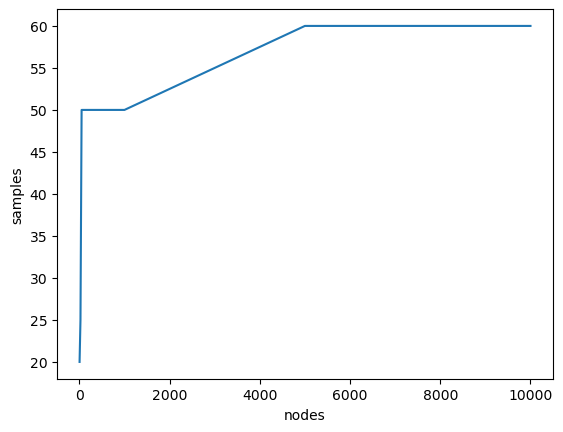

In [ ]:
plt.plot(plot_x,plot_y)
plt.xlabel("nodes")
plt.ylabel("samples")
plt.show()